#supervised learing

In [ ]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
!pip install patool
import patoolib

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.5/77.5 KB 3.2 MB/s eta 0:00:00


In [ ]:
patoolib.extract_archive("/content/drive/MyDrive/workong remote/mlarchive/data/drugsComTrain_raw.csv.zip", outdir="/content/drive/MyDrive/workong remote/mlarchive/data")

patool: Extracting /content/drive/MyDrive/workong remote/mlarchive/data/drugsComTrain_raw.csv.zip ...
patool: running /usr/bin/7z x "-o/content/drive/MyDrive/workong remote/mlarchive/data" -- "/content/drive/MyDrive/workong remote/mlarchive/data/drugsComTrain_raw.csv.zip"
patool: ... /content/drive/MyDrive/workong remote/mlarchive/data/drugsComTrain_raw.csv.zip extracted to `/content/drive/MyDrive/workong remote/mlarchive/data'.


'/content/drive/MyDrive/workong remote/mlarchive/data'

In [ ]:
data= pd.read_csv('/content/drive/MyDrive/workong remote/mlarchive/data/drugsComTrain_raw.csv')

In [ ]:
df.head

<bound method NDFrame.head of         uniqueID                  drugName                     condition  \
0         206461                 Valsartan  Left Ventricular Dysfunction   
1          95260                Guanfacine                          ADHD   
2          92703                    Lybrel                 Birth Control   
3         138000                Ortho Evra                 Birth Control   
4          35696  Buprenorphine / naloxone             Opiate Dependence   
...          ...                       ...                           ...   
161292    191035                   Campral            Alcohol Dependence   
161293    127085            Metoclopramide               Nausea/Vomiting   
161294    187382                   Orencia          Rheumatoid Arthritis   
161295     47128        Thyroid desiccated           Underactive Thyroid   
161296    215220              Lubiprostone         Constipation, Chronic   

                                                   review

In [ ]:

test= pd.read_csv('/content/drive/MyDrive/workong remote/mlarchive/data/drugsComTest_raw.csv/drugsComTest_raw.csv')


In [ ]:
test.head

<bound method NDFrame.head of        uniqueID         drugName                     condition  \
0        163740      Mirtazapine                    Depression   
1        206473       Mesalamine  Crohn's Disease, Maintenance   
2        159672          Bactrim       Urinary Tract Infection   
3         39293         Contrave                   Weight Loss   
4         97768  Cyclafem 1 / 35                 Birth Control   
...         ...              ...                           ...   
53761    159999        Tamoxifen     Breast Cancer, Prevention   
53762    140714     Escitalopram                       Anxiety   
53763    130945   Levonorgestrel                 Birth Control   
53764     47656       Tapentadol                          Pain   
53765    113712        Arthrotec                      Sciatica   

                                                  review  rating       date  \
0      "I&#039;ve tried a few antidepressants over th...      10  28-Feb-12   
1      "My son has 

In [ ]:
# as both the dataset contains same columns we can combine them for better analysis

#data = pd.concat([df, test])
data.head()

,uniqueID,drugName,condition,review,rating,date,usefulCount
0,206461,Valsartan,Left Ventricular Dysfunction,"""It has no side effect, I take it in combinati...",9,20-May-12,27
1,95260,Guanfacine,ADHD,"""My son is halfway through his fourth week of ...",8,27-Apr-10,192
2,92703,Lybrel,Birth Control,"""I used to take another oral contraceptive, wh...",5,14-Dec-09,17
3,138000,Ortho Evra,Birth Control,"""This is my first time using any form of birth...",8,3-Nov-15,10
4,35696,Buprenorphine / naloxone,Opiate Dependence,"""Suboxone has completely turned my life around...",9,27-Nov-16,37


#Analyze and understand data 
# the most common drugs

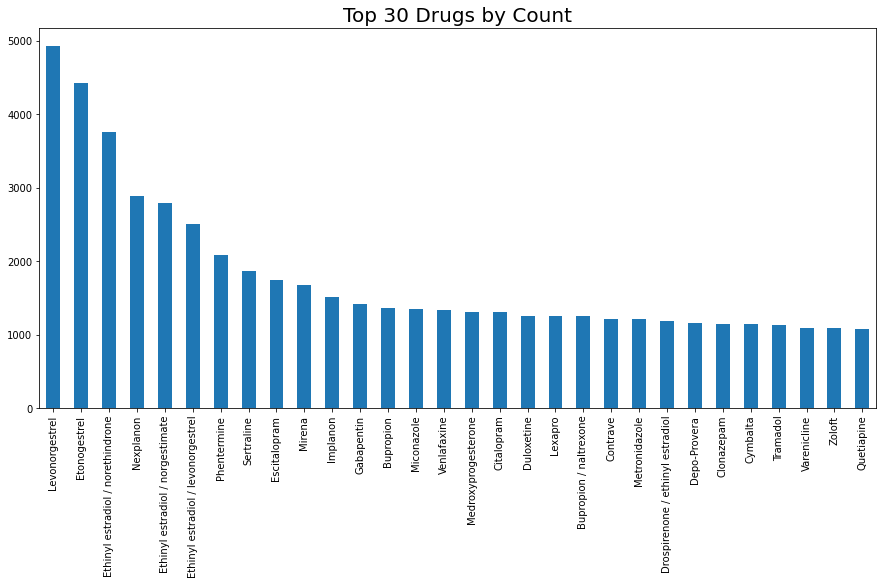

In [ ]:
top_30_drugs = data.drugName.value_counts()[:30]
plt.figure(figsize = (15,7))
top_30_drugs.plot(kind = 'bar');
plt.title('Top 30 Drugs by Count',fontsize = 20);

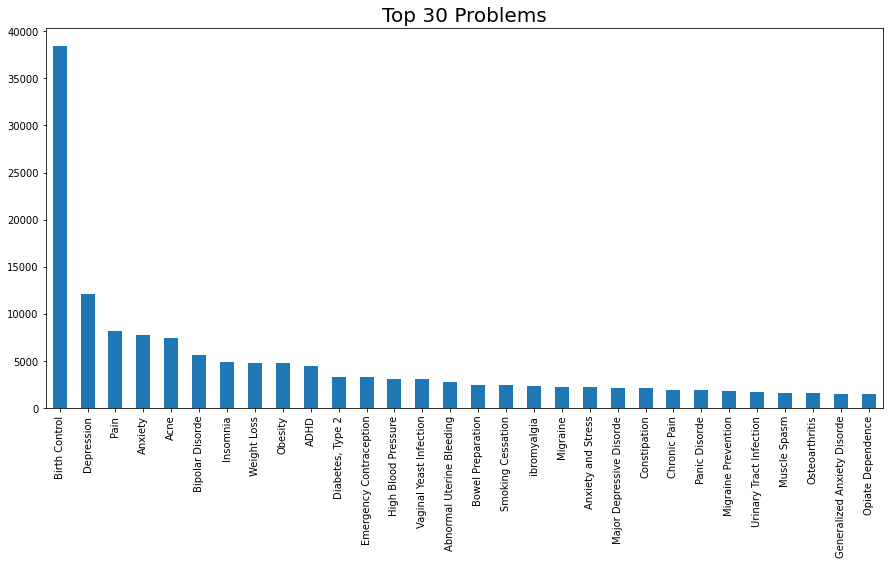

In [ ]:
top_30_problems = data.condition.value_counts()[:30]
plt.figure(figsize = (15,7))
top_30_problems.plot(kind = 'bar');
plt.title('Top 30 Problems',fontsize = 20);

#preprocessing

In [ ]:
import string
data['review_clean']=data['review'].str.replace('[{}]'.format(string.punctuation), '')
data.head()

<ipython-input-4-a532e2fd263c>:2: FutureWarning: The default value of regex will change from True to False in a future version.
  data['review_clean']=data['review'].str.replace('[{}]'.format(string.punctuation), '')


,uniqueID,drugName,condition,review,rating,date,usefulCount,review_clean
0,206461,Valsartan,Left Ventricular Dysfunction,"""It has no side effect, I take it in combinati...",9,20-May-12,27,It has no side effect I take it in combination...
1,95260,Guanfacine,ADHD,"""My son is halfway through his fourth week of ...",8,27-Apr-10,192,My son is halfway through his fourth week of I...
2,92703,Lybrel,Birth Control,"""I used to take another oral contraceptive, wh...",5,14-Dec-09,17,I used to take another oral contraceptive whic...
3,138000,Ortho Evra,Birth Control,"""This is my first time using any form of birth...",8,3-Nov-15,10,This is my first time using any form of birth ...
4,35696,Buprenorphine / naloxone,Opiate Dependence,"""Suboxone has completely turned my life around...",9,27-Nov-16,37,Suboxone has completely turned my life around ...


In [ ]:
data = data.fillna({'review':''})

make new column target label name it sentment

In [ ]:
data['sentiment'] = data['rating'].apply(lambda rating : +1 if rating > 5 else -1)
data.head()

,uniqueID,drugName,condition,review,rating,date,usefulCount,review_clean,sentiment
0,206461,Valsartan,Left Ventricular Dysfunction,"""It has no side effect, I take it in combinati...",9,20-May-12,27,It has no side effect I take it in combination...,1
1,95260,Guanfacine,ADHD,"""My son is halfway through his fourth week of ...",8,27-Apr-10,192,My son is halfway through his fourth week of I...,1
2,92703,Lybrel,Birth Control,"""I used to take another oral contraceptive, wh...",5,14-Dec-09,17,I used to take another oral contraceptive whic...,-1
3,138000,Ortho Evra,Birth Control,"""This is my first time using any form of birth...",8,3-Nov-15,10,This is my first time using any form of birth ...,1
4,35696,Buprenorphine / naloxone,Opiate Dependence,"""Suboxone has completely turned my life around...",9,27-Nov-16,37,Suboxone has completely turned my life around ...,1


split train and test

In [ ]:
from sklearn.model_selection import train_test_split
train_data,test_data = train_test_split(data,test_size = 0.20)
print('Size of train_data is :', train_data.shape)
print('Size of test_data is :', test_data.shape)

Size of train_data is : (129037, 9)
Size of test_data is : (32260, 9)


Build the word count vector for each review
We will now compute the word count for each word that appears in the reviews. A vector consisting of word counts is often referred to as bag-of-word features. Since most words occur in only a few reviews, word count vectors are sparse. For this reason, scikit-learn and many other tools use sparse matrices to store a collection of word count vectors. Refer to appropriate manuals to produce sparse word count vectors. General steps for extracting word count vectors are as follows:

Learn a vocabulary (set of all words) from the training data. Only the words that show up in the training data will be considered for feature extraction. Compute the occurrences of the words in each review and collect them into a row vector. Build a sparse matrix where each row is the word count vector for the corresponding review. Call this matrix train_matrix. Using the same mapping between words and columns, convert the test data into a sparse matrix test_matrix. The following cell uses CountVectorizer in scikit-learn. Notice the token_pattern argument in the constructor.

In [ ]:
import gc
from sklearn.feature_extraction.text import HashingVectorizer

vectorizer = HashingVectorizer()

train_matrix = vectorizer.transform(train_data['review_clean'].values.astype('U'))
test_matrix = vectorizer.transform(test_data['review_clean'].values.astype('U'))

gc.collect()

0

#Model

In [ ]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier()
rf = clf.fit(train_matrix,train_data['sentiment'])

In [ ]:
import pickle
pickle.dump(clf, open('/content/drive/MyDrive/workong remote/mlarchive/data/model.pkl', 'wb'))

In [ ]:
pickled_model = pickle.load(open('/content/drive/MyDrive/workong remote/mlarchive/data/model.pkl', 'rb'))


In [ ]:
y_pred = pickled_model.predict(test_matrix)
from sklearn.metrics import f1_score
f1_score(y_pred,test_data.sentiment)

0.9139995557619691

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report

cm = confusion_matrix(test_data.sentiment,y_pred)
cm

array([[ 5369,  4182],
       [   77, 22632]])

Text(33.0, 0.5, 'Truth')

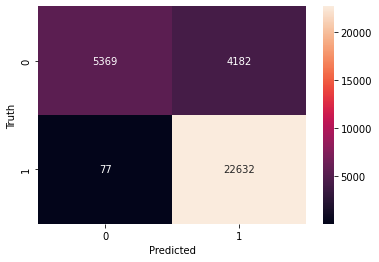

In [ ]:
from matplotlib import pyplot as plt
import seaborn as sn
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(test_data.sentiment, y_pred))

              precision    recall  f1-score   support

          -1       0.99      0.56      0.72      9551
           1       0.84      1.00      0.91     22709

    accuracy                           0.87     32260
   macro avg       0.91      0.78      0.82     32260
weighted avg       0.89      0.87      0.86     32260

